In [1]:
import sys
sys.path.append("/home/andrei/GitProjects/HeteroR/workflow/scripts")
from GRF_parser import parse_grf_output
import pandas as pd

# Intro
Here you'll find some summary and plots related to direct repeats found in our strains by GRF

Last update:

In [2]:
str(pd.to_datetime('today'))

'2021-12-17 13:35:48.556587'

So far 11 strains were processed using GRF. Here they are:

In [3]:
%cd "/home/andrei/Data/HeteroR/results/direct_repeats/"
%ls

/home/andrei/Data/HeteroR/results/direct_repeats
DA62886/  DA63052/  DA63160/  DA63362/  DA63680/  DA63752/  DA63876/  DA63980/
DA62892/  DA63054/  DA63178/  DA63366/  DA63682/  DA63758/  DA63882/  DA63988/
DA62902/  DA63060/  DA63182/  DA63368/  DA63684/  DA63760/  DA63884/  DA64000/
DA62918/  DA63062/  DA63186/  DA63382/  DA63686/  DA63766/  DA63888/  DA64002/
DA62920/  DA63082/  DA63210/  DA63570/  DA63688/  DA63770/  DA63890/  DA64004/
DA62942/  DA63084/  DA63218/  DA63594/  DA63690/  DA63776/  DA63900/  DA64006/
DA62944/  DA63094/  DA63226/  DA63596/  DA63696/  DA63784/  DA63914/  DA64014/
DA62946/  DA63098/  DA63244/  DA63608/  DA63702/  DA63790/  DA63916/  DA64024/
DA62954/  DA63102/  DA63248/  DA63626/  DA63706/  DA63816/  DA63918/  DA64026/
DA62958/  DA63106/  DA63252/  DA63640/  DA63710/  DA63818/  DA63926/  DA64030/
DA62978/  DA63112/  DA63254/  DA63642/  DA63714/  DA63826/  DA63940/  DA64048/
DA62998/  DA63122/  DA63264/  DA63644/  DA63718/  DA63828/  DA63942/  DA64058/
DA6

Now I have some results of repeats analysis in 11 strains.
For strain DA62886 GRF found 1.4 million repeats with the following settings (minimal repeat length 10 bp, no mismatches):

`grf-main -i regions_output.fasta -c 2 -o DA62886_perfect_repeats_GRF_test -t 10 --min_tr 10 -f 1 --max_mismatch
0 --seed_mismatch 0 --max_space 204000 --min_space 500`

Some repeats were counted more than once, so duplicates are removed from the table below

Results look like this:

In [4]:
import glob

def make_repeats_df(spacer_file, strain_index=0):
    # remove duplicated rows!
    with open(spacer_file) as f:
        output_lines = [line.rstrip() for line in f.readlines()]
    parsed_lines = [parse_grf_output(line) for line in output_lines]
    spacer_df = pd.DataFrame(columns=["record_id", "start_1", "end_1", "start_2", "end_2", "length"], data=parsed_lines)
    spacer_df["strain"] = spacer_file.split("/")[strain_index]
    return spacer_df


# read spacer files and make DF for each
grf_results_df =pd.concat([make_repeats_df(file) for file in glob.glob("DA*/repeats/perfect.spacer.id")])

grf_results_df

,record_id,start_1,end_1,start_2,end_2,length,strain
0,1,123259,123269,323162,323172,10,DA63668
1,1,124227,124237,322983,322993,10,DA63668
2,1,124249,124259,322600,322610,10,DA63668
3,1,124164,124175,322029,322040,11,DA63668
4,1,125381,125393,323221,323233,12,DA63668
...,...,...,...,...,...,...,...
1556362,9,59429,59440,59970,59981,11,DA64024
1556363,9,49987,49997,50517,50527,10,DA64024
1556364,9,1096,1113,1612,1629,17,DA64024
1556365,9,67459,67469,67974,67984,10,DA64024


In [5]:
grf_results_df.drop_duplicates(inplace=True)

# Number of repeats per strain

### As a table

In [6]:
nrows_df = pd.DataFrame(grf_results_df["strain"].value_counts())
nrows_df = nrows_df.rename(columns={"strain": "counts"})
nrows_df["strain"] = nrows_df.index
nrows_df

,counts,strain
DA63726,689221,DA63726
DA63026,673534,DA63026
DA63862,670311,DA63862
DA63850,630109,DA63850
DA63366,624716,DA63366
DA63702,623753,DA63702
DA64024,613124,DA64024
DA62886,610817,DA62886
DA63668,608037,DA63668
DA63776,604903,DA63776


### As a barplot

<AxesSubplot:xlabel='strain', ylabel='counts'>

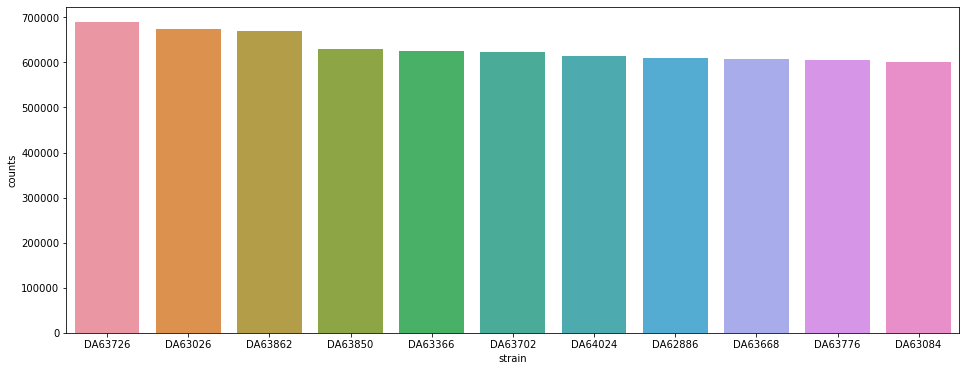

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(16,6))

sns.barplot(x="strain", y="counts", data=nrows_df)


# Repeat length distribution


[None]

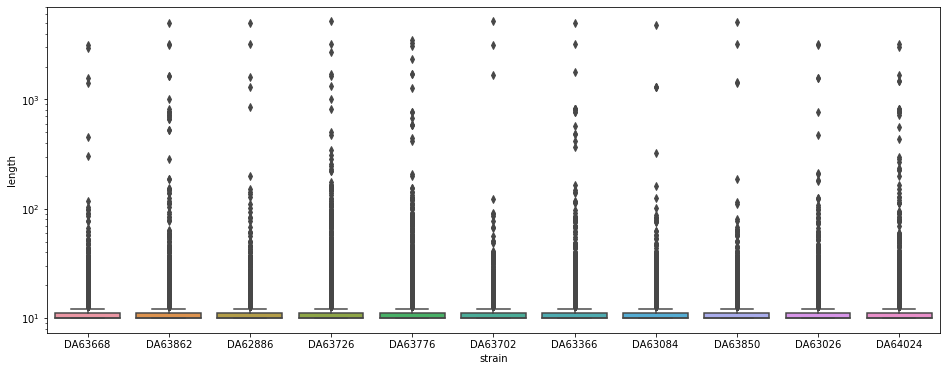

In [20]:
plt.figure(figsize=(16, 6))

bxplt = sns.boxplot(x="strain", y="length", data=grf_results_df)
bxplt.set(yscale="log")

# Test run of GRF for imperfect repeats

As it was planned - max mismatch 10%

`grf-main -i regions.fasta -c 2 -o out_mismatch10 -t 14 --min_tr 10 -f 1 --max_mismatch 10 --seed_mismatch 0 --max_space 205000 --min_space 500`

it gives 1 394 678 lines

In [8]:
mismatch_output = "/home/andrei/Data/HeteroR/test_dir/GRF/DA63366/out_mismatch10/perfect.spacer.id"

mismatch_df = make_repeats_df(mismatch_output, strain_index=7)

mismatch_df

,record_id,start_1,end_1,start_2,end_2,length,strain
0,1,156785,156796,355577,355588,11,DA63366
1,1,155793,155803,354429,354439,10,DA63366
2,1,156991,157004,355523,355536,13,DA63366
3,1,155876,155886,354108,354118,10,DA63366
4,1,157996,158006,355931,355941,10,DA63366
...,...,...,...,...,...,...,...
1394673,2,86562,86574,87116,87128,12,DA63366
1394674,2,67576,67587,68111,68122,11,DA63366
1394675,2,57930,57940,58456,58466,10,DA63366
1394676,2,90519,90534,91034,91049,15,DA63366


In [9]:
mismatch_df.drop_duplicates(inplace=True)
len(mismatch_df)


567249

In [10]:
len(grf_results_df.strain=="DA63366")

6950230

In [12]:
grf_results_df[grf_results_df.strain=="DA63366"].length.describe()

count    624716.000000
mean         10.441657
std           8.454774
min          10.000000
25%          10.000000
50%          10.000000
75%          11.000000
max        4972.000000
Name: length, dtype: float64

a lot less without duplicates

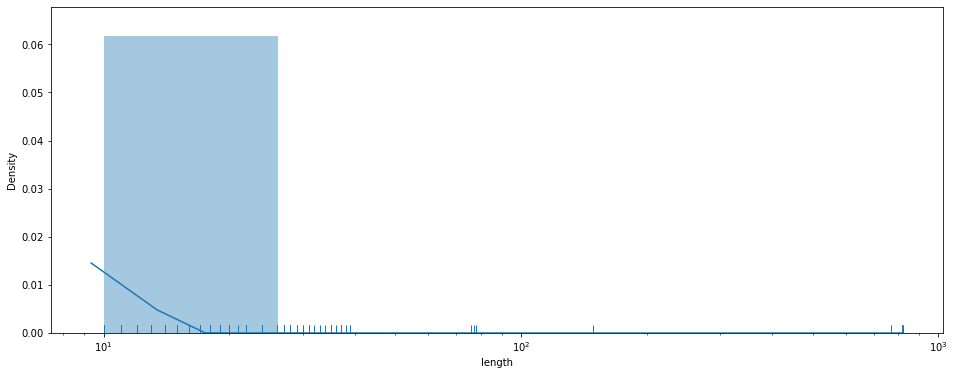

In [ ]:
plt.figure(figsize=(16, 6))

dstrplt = sns.distplot(mismatch_df.length, rug=True, bins=100)
dstrplt.set(xscale="log")

# Repeat quantification

For example, I will use strain 5 strains with annotated repeats:

DA63084
DA63186
DA63322
DA63946
DA64026

Parse GRF output using `GRF_parser.py`

>"perfect.id": TDRs with perfect stems and no spacer in the middle.
"perfect.spacer.id": TDRs with perfect stems and a spacer in the middle.
"imperfect.id": TDRs with imperfect stems.

Another question: size of amplifiable region: how to find? distance between repeats of similar length within one region and on the different?

## Prepare function form GRF_parser.py

In [1]:
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation, ExactPosition
import pandas as pd
#from BCBio import GFF
import os

# some functions from GRF_parser
def parse_grf_output_w_ranges(header):
    """
    MUST BE RE-WRITTEN (OR NOT) FOR A CASE WHEN A GENE NAME IS IN THE HEADER
    :param header: a char string like '>1:0-190543:951:190482:14m' or '>1:155171-355997:1372:198472:10m1D3m'
    :return: a list of values from parsed header
    """
    first_split = header.split(":")
    record_id = first_split[0][1:]
    # this works for both mismatch or no mismatch types of output
    repeat_len = int(first_split[-1].split("m")[0])
    range_ = first_split[1].split("-")
    range_start, range_end = int(range_[0]), int(range_[-1])
    repeat_1_start_in_range = int(first_split[2])
    repeat_2_end_in_range = int(first_split[3])

    repeat_1_start_in_chrom = range_start + repeat_1_start_in_range
    repeat_1_end_in_chrom = repeat_1_start_in_chrom + repeat_len

    repeat_2_end_in_chrom = range_start + repeat_2_end_in_range
    repeat_2_start_in_chrom = repeat_2_end_in_chrom - repeat_len

    return [record_id, repeat_1_start_in_chrom, repeat_1_end_in_chrom, repeat_2_start_in_chrom,
            repeat_2_end_in_chrom, repeat_len]


def parse_grf_output_no_ranges(header):
    """
    for newer version of grf files: '>IPFHMEHC_00036_gene:12520:113509:13m1I2m2I5m' or
    '>IPFHMEHC_00036_gene:95122:101284:29m'
    where headers do not contain coordinates of regions on chromosome (i.e. 'ranges')
    :param header: a string from grf output, see above
    :return: a list of coordinates from this header ready to be turned into a gff-record
    """
    first_split = header.split(":")
    record_id = first_split[0][1:]
    repeat_len = int(first_split[-1].split("m")[0])
    repeat_1_start_in_range = int(first_split[1])
    repeat_1_end_in_range = repeat_1_start_in_range + repeat_len
    repeat_2_end_in_range = int(first_split[2])
    repeat_2_start_in_range = repeat_2_end_in_range - repeat_len
    return [record_id, repeat_1_start_in_range, repeat_1_end_in_range, repeat_2_start_in_range, repeat_2_end_in_range,
            repeat_len]


def make_repeat_df(input_grf, min_len):
    # read spacer IDs
    with open(input_grf) as f:
        repeat_ids = [line.rstrip() for line in f.readlines()]

    # read assembly
    # assembly = [rec for rec in SeqIO.parse(input_assembly, "fasta")]

    # make features rows from spacer IDs
    gff_rows = [parse_grf_output_no_ranges(line) for line in repeat_ids]
    gff_df = pd.DataFrame(columns=["record_id", "start_1", "end_1", "start_2", "end_2", "length"], data=gff_rows)
    gff_df.drop_duplicates(inplace=True)

    # filter out too short repeats
    gff_df = gff_df[gff_df.length > min_len]

    # make a gff object from this filtered data frame
    # one SeqRecord with features per record in assembly
    # gff_records = [gff_object(gff_df, record) for record in assembly]
    return gff_df

Inputs on HPZ2

In [ ]:
# add length
# there is a copy of the same file on Google Drive
perfect_in = "/home/andrei/Data/HeteroR/results/direct_repeats/DA63186/repeats_no_mismatch/perfect.spacer.id"
imperfect_in = "/home/andrei/Data/HeteroR/results/direct_repeats/DA63186/repeats_no_mismatch/imperfect.id"
in_assembly = "/home/andrei/Data/HeteroR/results/assemblies_joined/DA63186/assembly.fasta"

Inputs on Mac

In [2]:
strains = ["DA63084", "DA63186", "DA63322", "DA63946", "DA64026"]
main_path = "/Users/andgu885/GoogleDrive/HeteroR/tests/repeat_quantification/%s/perfect.spacer.id"
#perfect_in_lst = [path % strain for strain in strains]
#perfect_in_lst
#imperfect_in = "/Users/andgu885/GoogleDrive/HeteroR/tests/DA63186/repeats_no_mismatch/imperfect.id"
#in_assembly = "/Users/andgu885/GoogleDrive/HeteroR/tests/DA63186/assembly.fasta"

## Make a DataFrame with repeats

There is no repeated rows (i.e. pair of coordinates) and nothing shorter than `min_len`

In [3]:
# cd "/home/andrei/Data/HeteroR"
df_lst = list()
for strain in strains:
    file_path = main_path %strain
    df = make_repeat_df(input_grf=file_path, min_len=20)
    df["strain"] = strain
    df_lst.append(df)
    
repeat_df = pd.concat(df_lst)
repeat_df.head()

,record_id,start_1,end_1,start_2,end_2,length,strain
0,IPFHMEHC_00036_gene,95122,95151,101255,101284,29,DA63084
1,IPFHMEHC_00036_gene,96581,96683,101273,101375,102,DA63084
4,IPFHMEHC_00036_gene,41131,41207,41458,41534,76,DA63084
5,IPFHMEHC_00036_gene,41208,41233,41535,41560,25,DA63084
6,IPFHMEHC_00036_gene,41249,41375,41576,41702,126,DA63084


In [4]:
len(repeat_df)

5733

In [6]:
repeat_df.to_csv("/Users/andgu885/GoogleDrive/HeteroR/tests/repeat_quantification/repeats_summary_table.csv")

In [7]:
repeat_df[repeat_df["strain"]=="DA63084"]

,record_id,start_1,end_1,start_2,end_2,length,strain
0,IPFHMEHC_00036_gene,95122,95151,101255,101284,29,DA63084
1,IPFHMEHC_00036_gene,96581,96683,101273,101375,102,DA63084
4,IPFHMEHC_00036_gene,41131,41207,41458,41534,76,DA63084
5,IPFHMEHC_00036_gene,41208,41233,41535,41560,25,DA63084
6,IPFHMEHC_00036_gene,41249,41375,41576,41702,126,DA63084
...,...,...,...,...,...,...,...
1414,IPFHMEHC_04309_gene,187019,187048,190205,190234,29,DA63084
1417,IPFHMEHC_04331_gene,68594,68618,91616,91640,24,DA63084
1418,IPFHMEHC_04331_gene,150096,150119,153282,153305,23,DA63084
1420,IPFHMEHC_04331_gene,150492,150521,153678,153707,29,DA63084


What I can look at?

- lengths distribution 
   - overall
   - per gene 
- count per gene
- distances between repeats

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10


##  Number of unique repeats

By unique lengths

In [17]:
len(set(repeat_df.length))

154

## Repeat length distribution

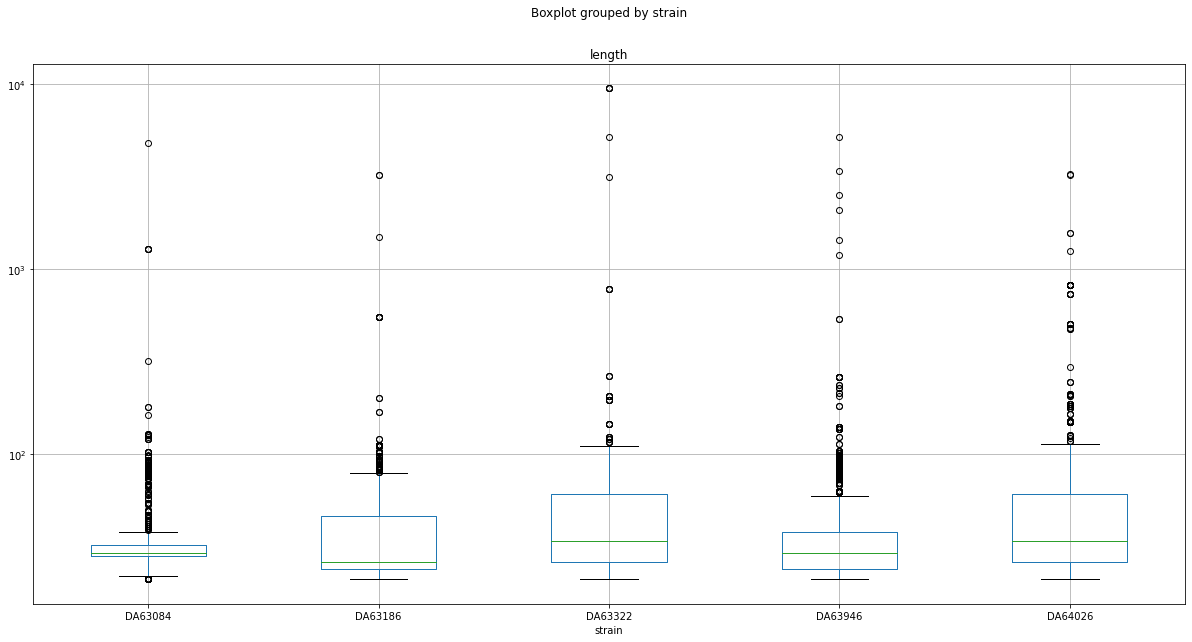

In [6]:
bxplt = repeat_df.boxplot(column='length', by='strain')
bxplt.set_yscale('symlog')

## Repeat count distribution

### Overall

In [29]:
repeat_counts = repeat_df.groupby(by=["record_id", "strain"]).size()
repeat_counts = pd.DataFrame(repeat_counts).reset_index(level=["strain", "record_id"])
repeat_counts = repeat_counts.rename(columns={0:"n_repeats"})
#repeat_counts.index = repeat_counts.record_id
repeat_counts

,record_id,strain,n_repeats
0,HCLAOJAB_00148_gene,DA63322,8
1,HCLAOJAB_00168_gene,DA63322,8
2,HCLAOJAB_00363_gene,DA63322,22
3,HCLAOJAB_00364_gene,DA63322,22
4,HCLAOJAB_00365_gene,DA63322,22
...,...,...,...
299,PBKEJGAK_05145_gene,DA64026,28
300,PBKEJGAK_05146_gene,DA64026,28
301,PBKEJGAK_05147_gene,DA64026,29
302,PBKEJGAK_05154_gene,DA64026,29


### Number of genes with repeats in surrounding regions

In [33]:
repeat_counts.groupby(by=["strain"]).size()

strain
DA63084    57
DA63186    57
DA63322    58
DA63946    62
DA64026    70
dtype: int64

### Repeat counts by strain

<AxesSubplot:title={'center':'n_repeats'}, xlabel='strain'>

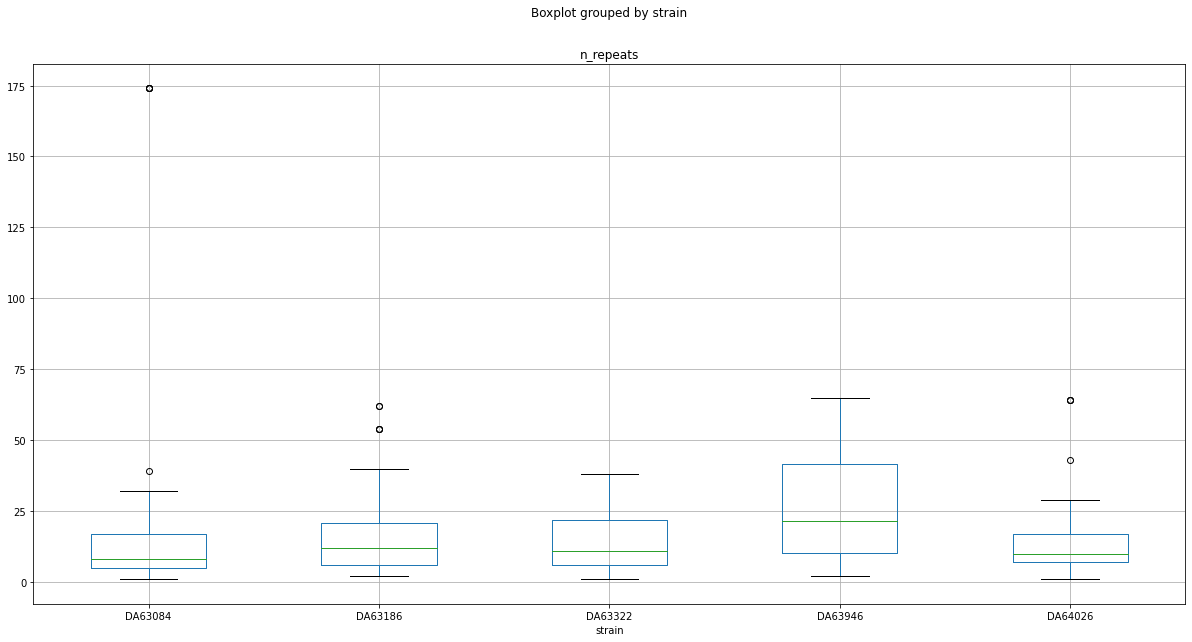

In [23]:
repeat_counts.boxplot(column="n_repeats", by="strain")

## Repeat couts per gene

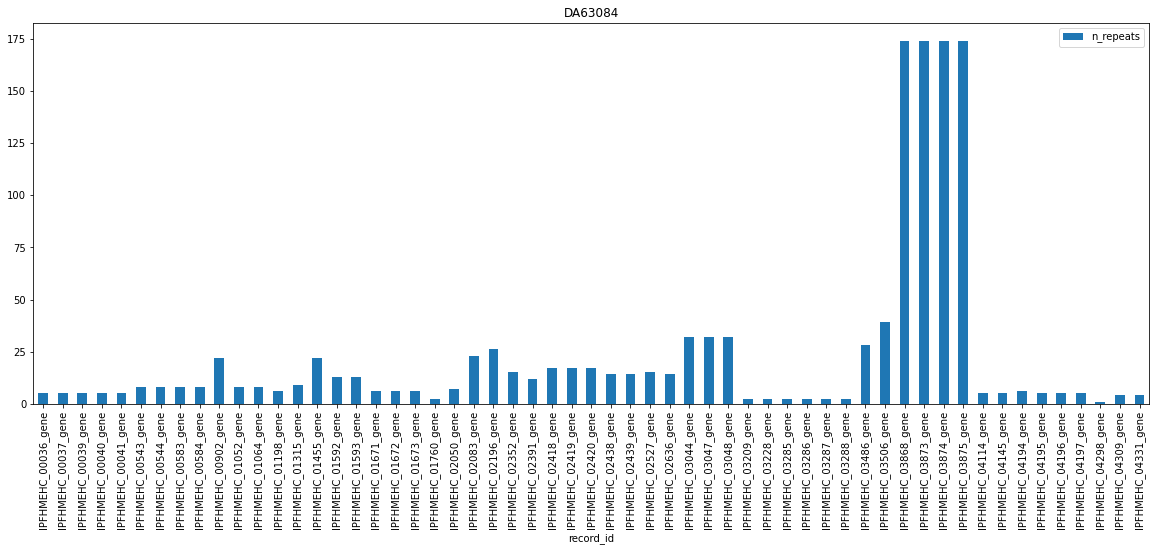

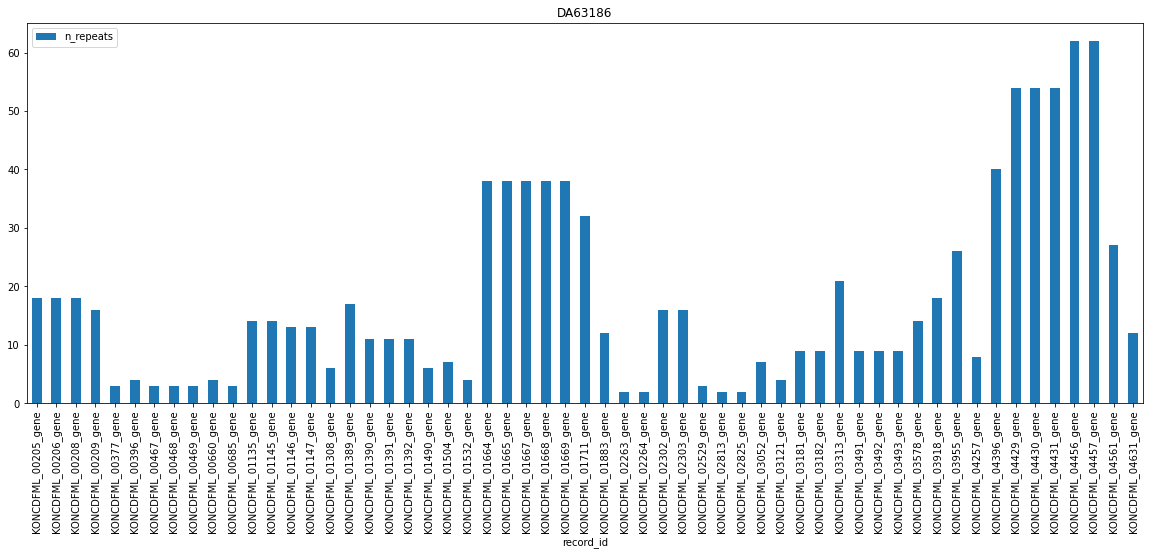

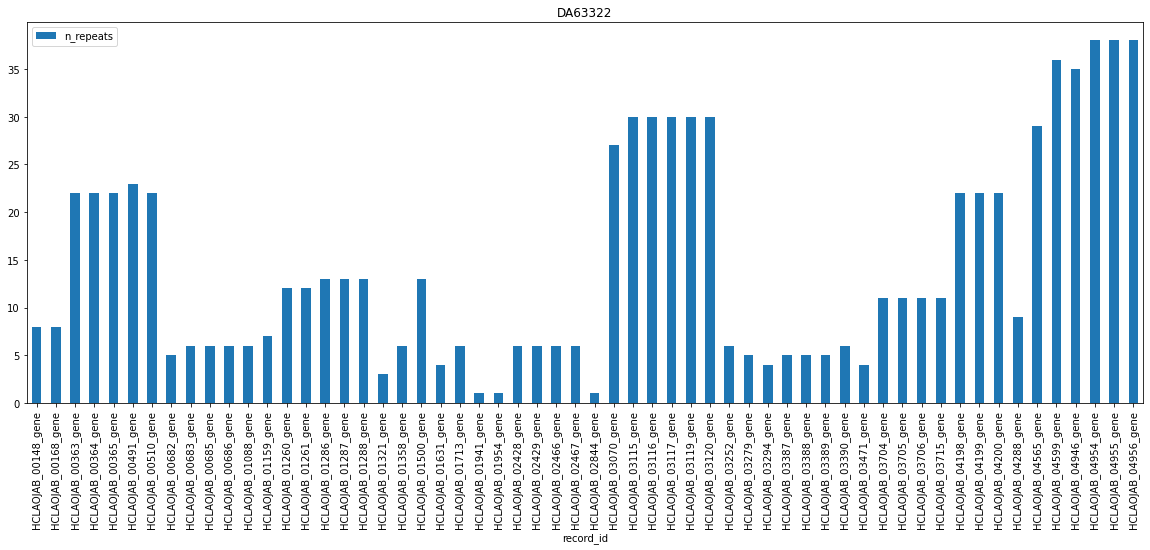

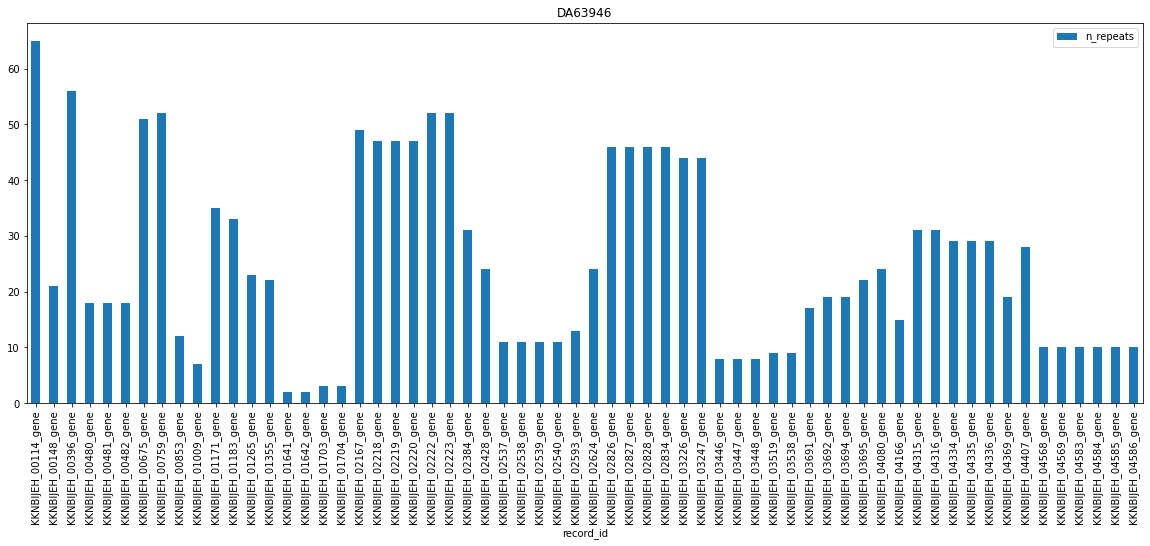

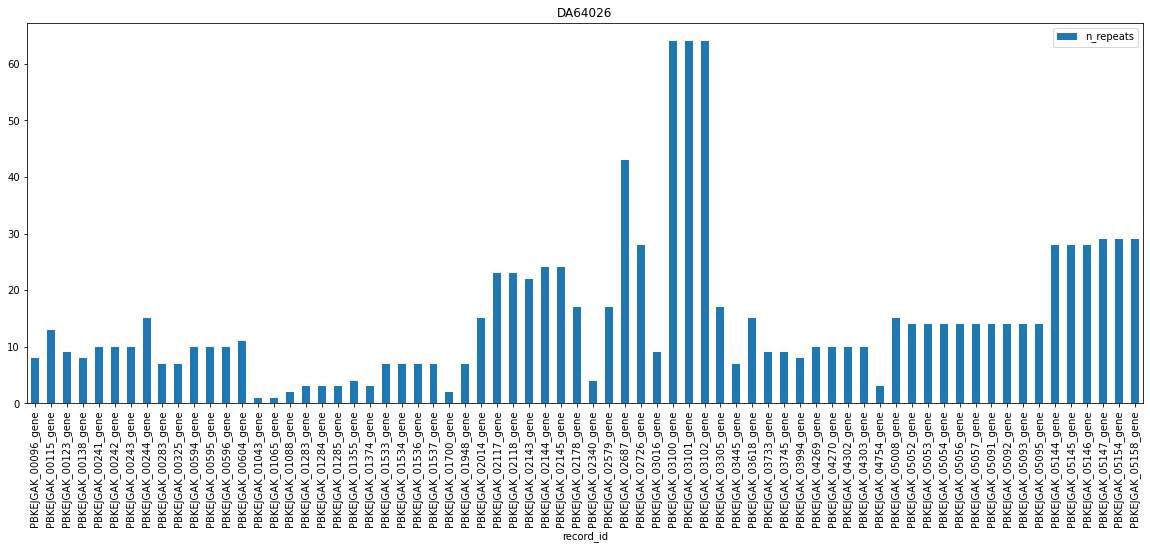

In [26]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,7
for strain in strains:
    repeat_counts[repeat_counts.strain == strain].plot.bar(x="record_id", y="n_repeats", title=strain)


# Compiling THE BIG FEATURES TABLE

that should contain all features like (all for a given AB)

| Strain   | N repeats | Median repeat length | Longest repeat length | Nearest distance to oriC | Median distance to oriC | Perfect match concentration | Number of RG on plasmids | AR min length | AR median length |...
|----------|-----------|----------------------|-----------------------|--------------------------|-------------------------|-----------------------------|--------------------------|---------------|------------------|---
| DA000000 | 500       |      200             |        5000           |          25000           |       40000             |            0.76             |          5               |     3000      |     15000        |...


Features:

 - number of RG
 - number of RG on plasmids
 - nearest distance to oriC
 - median distance to oriC
 - total number of repeats
 - median number of repeats
 - median repeat length
 - longest repeat length
 - match concetration (=number of mismatches)
 - amplifiable region (AR) min length
 - AR median length
 - BLACK BOX
 

In [35]:
repeat_counts

,record_id,strain,n_repeats
0,HCLAOJAB_00148_gene,DA63322,8
1,HCLAOJAB_00168_gene,DA63322,8
2,HCLAOJAB_00363_gene,DA63322,22
3,HCLAOJAB_00364_gene,DA63322,22
4,HCLAOJAB_00365_gene,DA63322,22
...,...,...,...
299,PBKEJGAK_05145_gene,DA64026,28
300,PBKEJGAK_05146_gene,DA64026,28
301,PBKEJGAK_05147_gene,DA64026,29
302,PBKEJGAK_05154_gene,DA64026,29
